In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs
centers = [[1, 1], [-1, -1], [1, -1]]
X, y = make_blobs(n_samples=100, centers=centers,random_state=2,cluster_std=0.2)

In [9]:
class DB_Scan(object):
    def __init__(self,X,eps,min_pts):
        self.X=X
        self.eps=eps
        self.min_pts=min_pts
        d={}
        points=list(self.X)
        cluster=[0 for i in range(len(self.X))]
        d={'points':points,'cluster':cluster}
        self.df=pd.DataFrame(d)
    
    def euc_dis(self,rowi, rowj):
        ed = 0
        for i in range(len(rowi)):
            ed += (rowj[i] - rowi[i])**2
        return (ed**(1/2))

    def ngh(self,p):
        n_points={'point_index':[],'dis':[]}
        q=self.df['points'][self.df.index!=p]
        for index,other_point in zip(q.index,q):
            d=self.euc_dis(self.X[p],other_point)
            if (d<self.eps):            
                n_points['point_index'].append(index)
                n_points['dis'].append(d)
        return pd.DataFrame(n_points)
    
    def update(self):
        cluster=0
        for i in range(self.df.shape[0]):
            if self.df.iloc[i,1]==0:
                l=self.ngh(i)
                if (l.shape[0]>self.min_pts):
                    cluster=cluster+1
                    self.df.iloc[i,1]=cluster
                    for j in range(l.shape[0]):
                         self.df.iloc[l.iloc[j,0],1]=cluster

In [10]:
db = DB_Scan(X,1,5)
db.update()
db.df.head()

,points,cluster
0,"[0.9372983606013182, 1.1542023476138823]",1
1,"[-1.1306500535584072, -0.831508743685732]",2
2,"[1.1005762834316086, 0.7509423826785537]",1
3,"[-0.8609760789906017, -1.4066933092245226]",2
4,"[1.0730107032881682, -0.8451835933190602]",3


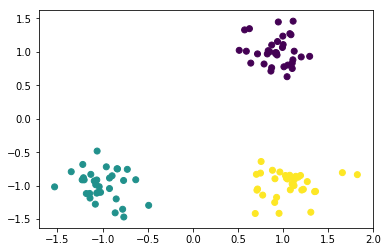

In [12]:
plt.scatter(X[:,0],X[:,1],c=db.df['cluster'])